In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv("HistoricalQuotes.csv")

In [4]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [11]:
data["Date"]=pd.to_datetime(data["Date"])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2518 non-null   datetime64[ns]
 1    Close/Last  2518 non-null   object        
 2    Volume      2518 non-null   int64         
 3    Open        2518 non-null   object        
 4    High        2518 non-null   object        
 5    Low         2518 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 118.2+ KB


In [14]:
data.columns = data.columns.str.strip()


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-03-01 to 2020-02-28
Columns: 2423 entries, Close/Last to Close_Diff
dtypes: float64(2422), int64(1)
memory usage: 46.6 MB


In [15]:
dollar_col=["Close/Last","Open","High","Low"]
for col in dollar_col:
    data[col]=data[col].replace('[\$,]', '',regex=True).astype(float)

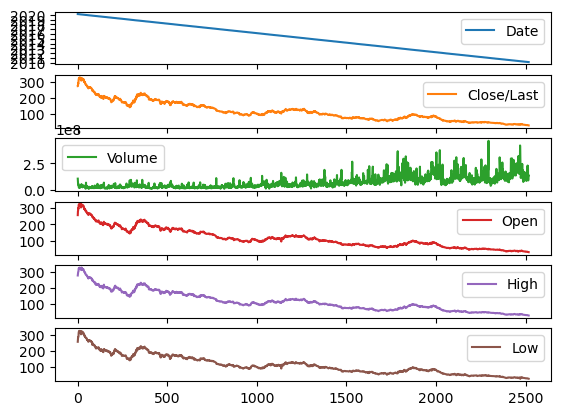

In [20]:
data.plot(subplots=True)
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2518 non-null   datetime64[ns]
 1   Close/Last  2518 non-null   float64       
 2   Volume      2518 non-null   int64         
 3   Open        2518 non-null   float64       
 4   High        2518 non-null   float64       
 5   Low         2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB


In [18]:
data


,Date,Close/Last,Volume,Open,High,Low
0,2020-02-28,273.3600,106721200,257.2600,278.4100,256.3700
1,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600
2,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000
3,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300
4,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771


In [19]:
data.sort_values('Date',inplace=True)

In [21]:
data.set_index("Date",inplace=True)

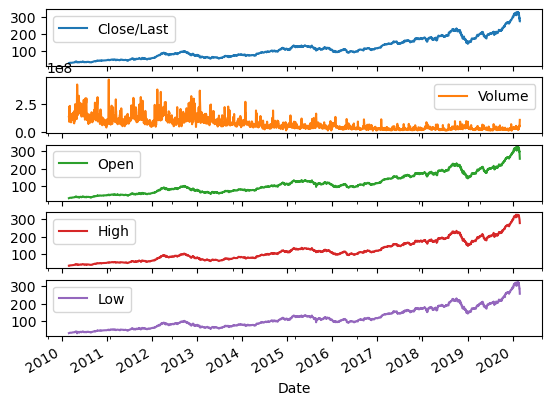

In [22]:
data.plot(subplots=True)
plt.show()

In [29]:
close_series=data["Close/Last"]

In [37]:
close_series.index.freq

In [39]:
close_series=close_series.asfreq('D')

In [40]:
arima_model=ARIMA(close_series,order=(1,1,1))

In [41]:

arima_result=arima_model.fit()

In [42]:
arima_result

In [47]:
from statsmodels.tsa.stattools import adfuller

In [56]:
adf_test = adfuller(close_series)

# Print results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])


ADF Statistic: 0.049181301276696725
p-value: 0.9624152269389332
Critical Values: {'1%': -3.432960050084045, '5%': -2.8626931078801285, '10%': -2.567383843706519}


In [45]:
# close_series.isna().sum() # Count missing values


0

In [51]:
close_series=close_series.squeeze()

In [53]:
close_series = close_series.reset_index(drop=True)


In [55]:
close_series = close_series.replace([np.inf, -np.inf], np.nan).dropna()


In [57]:
if adf_test[1] < 0.05:
    print("The time series is stationary (reject H0).")
else:
    print("The time series is not stationary (fail to reject H0). Differencing is needed.")

The time series is not stationary (fail to reject H0). Differencing is needed.


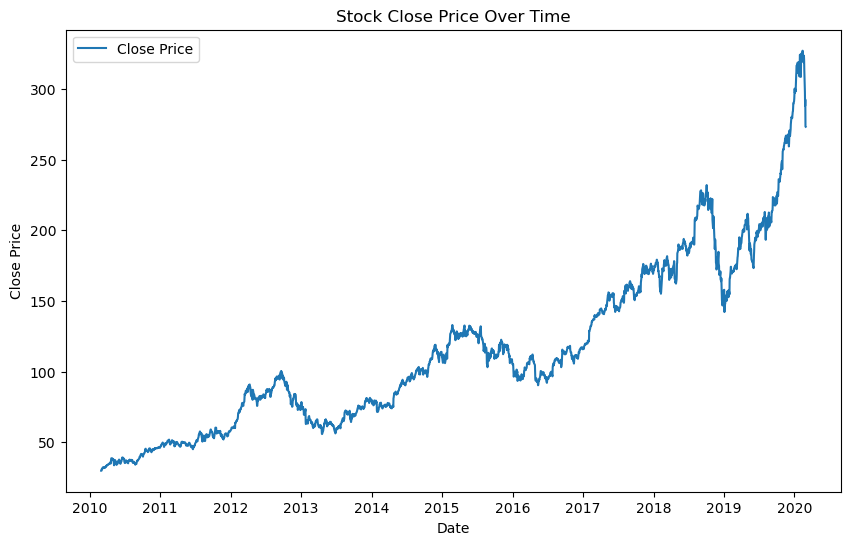

In [58]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['Close/Last'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [60]:
def adf_test(close_series):
    result2 = adfuller(close_series.dropna())
    print('ADF Statistic:', result2[0])
    print('p-value:', result2[1])
    if result2[1] <= 0.05:
        print("The series is stationary (reject null hypothesis)")
    else:
        print("The series is not stationary (fail to reject null hypothesis)")

adf_test(data['Close/Last'])


ADF Statistic: 0.049181301276696725
p-value: 0.9624152269389332
The series is not stationary (fail to reject null hypothesis)


Data differentiation

In [68]:
data["Close_Diff"] = data["Close/Last"].diff().dropna()
#Close_Diff(t)=Close/Last(t) −Close/Last(t−1)
# the dropna() fxn is used because the first row will have a NaN value since there's no previous value to subtract.
​


C:\Users\Admin\AppData\Local\Temp\ipykernel_17656\1520220291.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Close_Diff"] = data["Close/Last"].diff().dropna()


In [69]:
adf_test_diff = adfuller(data["Close_Diff"].dropna())

print("ADF Statistic (Differenced):", adf_test_diff[0])
print("p-value:", adf_test_diff[1])

if adf_test_diff[1] < 0.05:
    print("The differenced series is stationary.")
else:
    print("Further transformations may be needed.")

ADF Statistic (Differenced): -7.225565154664301
p-value: 2.057443713762677e-10
The differenced series is stationary.


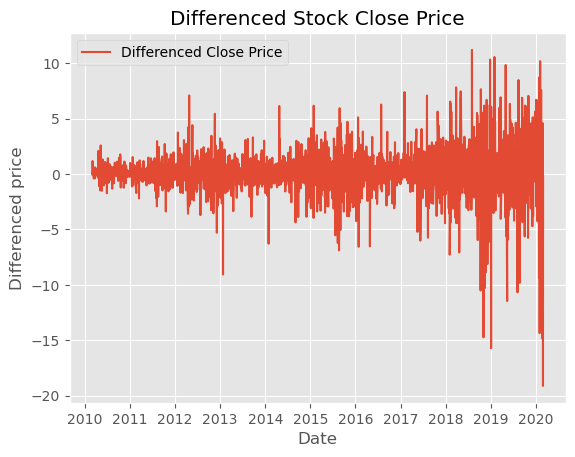

In [73]:
#plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.plot(data["Close_Diff"],label="Differenced Close Price")
plt.title("Differenced Stock Close Price")
plt.xlabel('Date')
plt.ylabel('Differenced price')
plt.legend()
plt.show()

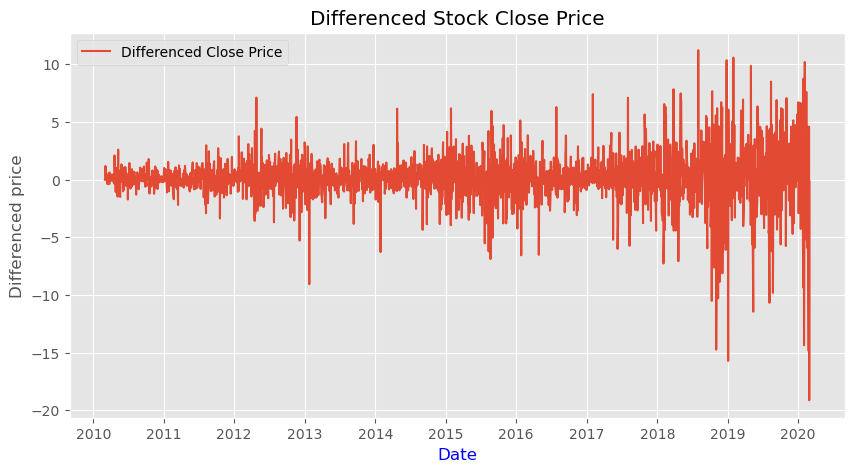

In [80]:
plt.figure(figsize=(10,5))
# plt.style.use('ggplot')
plt.plot(data["Close_Diff"],label="Differenced Close Price")
plt.title("Differenced Stock Close Price")
plt.xlabel('Date',color='Blue')
plt.ylabel('Differenced price')
plt.legend()
plt.show()

In [82]:
model=ARIMA(data["Close/Last"],order=(1,1,2))
model_fit=model.fit()
model_fit.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close/Last   No. Observations:                 2518
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5435.437
Date:                Thu, 03 Apr 2025   AIC                          10878.874
Time:                        20:46:06   BIC                          10902.197
Sample:                             0   HQIC                         10887.338
                               - 2518                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1062      0.316      0.336      0.737      -0.513       0.726
ma.L1         -0.0873      0.319     -0.274      0.784      -0.712       0.537
ma.L2         -0.0363      0.011     -3.458      0.001      -0.057      -0.016
sigma2         4.3977      0.050     87.899      0.000       4.300       4.496
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             13168.39
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               7.46   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
data.dtypes

Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
               ...   
288.08        float64
292.65        float64
273.52        float64
273.36        float64
Close_Diff    float64
Length: 2423, dtype: object